In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Классификация. Логистическая регрессия </b></h3>

<p style="align: center;"><img align=center src="https://sun9-3.userapi.com/impg/rMxsV1l3x_NgXZnO2BR_Z_vQ5CMfAysGMkpVrg/5vII3kSwywk.jpg?size=1233x403&quality=96&proxy=1&sign=607ece16ae211ad91d8c9a1ba285c822&type=album"  width=900></p>
<div class="alert alert-info">
    <h2>Некоторые важные определения</h2>
<ul>
 <li><b>Классификация</b> - задача о разделении классов, по заданному набору признаков.</li>
    <li><b>Логистическая регрессия</b>  - это статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой.</li>
    <li><b>Метод опорных векторов (англ. SVM)</b>  - поиск тем или иным способом разделяющей гиперплоскости между классами.</li>
    <li><b>Сигмоида (логистическая функция)</b>  - гладкая монотонная возрастающая нелинейная функция, которая часто применяется для «сглаживания» значений некоторой величины.</li>
</ul>
</div>


<h1><u>План урока</u></h1>

<p><font size="3" face="Arial">
<ul type="square"><a href="#1"></a>
    <li><a href="#1">Логистическая регрессия</a></li>
        <ul>
            <li><a href="#2">Теория. Масимизация правдоподобия</a></li>
            <li><a href="#3">Практика. Регрессия "из коробки"</a></li>    
    </ul>
    


<h2>Логистическая регрессия</h2>

<p id="1">Рассмотрим задачу логистической регрессии. В данной задаче ключевую роль играет функция <i><b>сигмоида</b></i> (логистическая функция), которая используется для прогнозирования вероятности возникновения некоторого события по значениям множества признаков:<
    /p>   $$\sigma (z) = \frac{1}{1+e^{-z}}\text{  ,  } z \in (-\infty, +\infty) \text{  ,  } \sigma(z) \in (-1, 1)$$
<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png"  width=400></p>

Как и в задаче линейной регрессии задаем аргумент
$z=\theta^{T}x = \theta_{0} + \theta_{1}x_{1} + ... + \theta_{n}x_n$, где $\theta_{i}$ - параметры модели (веса), а $x_i$ - известные нам признаки.
<p id="2"><h3>Теория. Масимизация правдоподобия</h3>
Чтобы модель могла обучаться, ей необходимо получать "штраф" за то, что она ошибается. Подбираем такой параметр $\theta$, чтобы наша функция правдоподобия $L(\theta)$ была максимальной:
$$\hat{\theta} = argmax_{\theta}L(\theta) = argmax_{\theta} \prod\limits^{m}_{i=1}P(y=y_{i} | x = x_i)$$
</p>
После логарифмирования получаем: 
$$lnL(\theta)=\sum\limits_{i=1}^mlogP(y=y_i | x=x_i) = \sum\limits_{i=1}^m y_i lnf(\theta^Tx_i) + (1-y_i)ln(1-f(\theta^Tx_i))$$
где $y_i$ - индикаторная переменная. Если предсказание верно - $y_i = 1$, то в сумме остается только первый член, а если нет, то второй.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/athletes.csv') # датасет - https://www.kaggle.com/rio2016/olympic-games
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [4]:
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


<p>Сделаем предобработку данных нашего датасета. Найдем и удалим пустые строчки нашего датасета</p>

In [5]:
data[ pd.isnull(data['height'])].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [6]:
data['height'].unique() 

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [7]:
# обнуляем ячейки с отсутствием данных
# data = data[pd.isnull(data['height']) == -1 ]
# data = data[pd.isnull(data['weight']) == -1 ]

data = data.fillna(-1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11538 non-null  object 
 5   height       11538 non-null  float64
 6   weight       11538 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


<div class="alert alert-info"><p> Далее используем популярную библиотеку <b>scikit-learn</b> для классического машинного обучения. Для дополнительного изучения всю документацию можете найти на <a href="https://scikit-learn.org/stable/">сайте</a>. Она умеет довольно неплохо решать множество задач машинного обучения, но чаще всего испольузется для обучения, а не для конкретных задач.</p></div>

In [9]:
from sklearn.linear_model import LogisticRegression

<p style="align: center;">Шаг 1. Предобработка данных. Для работы с переменными в рамках задачи <b><i>Логистической регрессии</i></b> нужно преобразовать категориальные переменные в числа. Например, вот так (см. рис), просто поставить в соответствие названию машин - уникальные числа.<img align=center src="https://miro.medium.com/max/875/1*K5JbqxIwwPmtiSNQhjLPRg.png"  width=800></p>

In [10]:
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [11]:
# попробуем выбрать какие-нибудь признаки, для начала
X = data [['height', 'sport','sex','nationality','weight']]

# столбец sport - категориальная переменная (не путать с континуальными)
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies (X, drop_first=True)

# столбец sex является целевой переменной, удаляем его из Х

#del X['gold']

print('Пометили вид спорта спортсмена единичкой.')
X.head()

Пометили вид спорта спортсмена единичкой.


,height,weight,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_boxing,sport_canoe,sport_cycling,sport_equestrian,...,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
0,1.72,64.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<p>LabelEncoder ставит в соответствие значению пола (женщина, мужчина) 0 и 1 </p>

In [12]:
# целевая переменная (столбец sex) снова является категориальной 
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
#cols = ['sport','sex','nationality']
#for i in cols:
#  X[i] = LabelEncoder().fit_transform(X[i])

In [15]:
le.fit( data['sex'])

LabelEncoder()

In [16]:
le.classes_

array(['female', 'male'], dtype=object)

In [17]:
le.transform( ['male', 'female', 'male']) # пример расшифровки

array([1, 0, 1])

In [18]:
le.inverse_transform([1, 0, 1])

array(['male', 'female', 'male'], dtype=object)

In [19]:
X

,height,weight,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_boxing,sport_canoe,sport_cycling,sport_equestrian,...,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
0,1.72,64.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1.64,58.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11534,1.73,63.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11535,1.85,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11536,1.60,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# записываем в таргетную переменную y преобразованный столбец sex

y = (data['gold']>0).astype('int32')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: gold, dtype: int32

<Axes: >

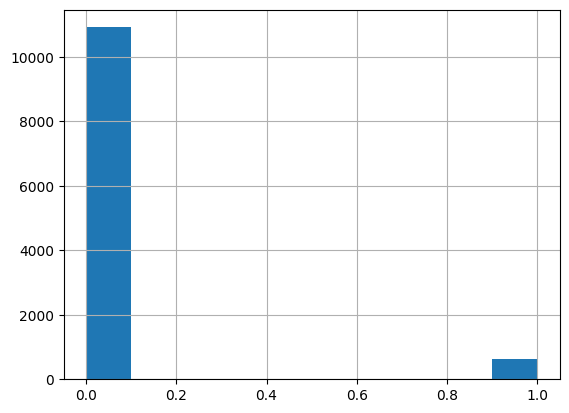

In [21]:
y.hist()

In [22]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, class_weight='balanced'))

In [23]:
model = LogisticRegression() # берем в качестве модели логистическую регресиию из scikit-learn

**<p>**Шаг 2 Текст, выделенный полужирным шрифтом. Обучение. Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору</p**>**

In [24]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11533    0
11534    0
11535    0
11536    0
11537    0
Name: gold, Length: 11538, dtype: int32

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train

,height,weight,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_boxing,sport_canoe,sport_cycling,sport_equestrian,...,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
3527,1.75,74.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6377,1.69,64.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8256,1.74,62.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
916,1.63,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5972,1.74,70.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.82,66.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5191,1.96,99.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,1.76,61.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,2.00,130.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
predictions[:10] # посмотрим как выглядят наши предсказания

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [29]:
model.predict(X_test) # получаем массив

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
model.predict_proba(X_test)

array([[0.63477974, 0.36522026],
       [0.46380454, 0.53619546],
       [0.41802701, 0.58197299],
       ...,
       [0.57882422, 0.42117578],
       [0.55984557, 0.44015443],
       [0.45105286, 0.54894714]])

<p>Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.</p>

In [30]:
model.score(X_train, y_train) 

0.9464788732394366

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_test, model.predict(X_test))

0.0

In [33]:
f1_score(y_train, model.predict(X_train))

0.0

In [34]:
model.score(X_test,y_test)

0.945840554592721

<h1>Спасибо за внимание!</h1>